# Solution Graded Exercise 3: Perceptual Decision Making

first name: Dylan

last name: Bourgeois

sciper: 224797

date: 28/05/2017

*Your teammate*

first name of your teammate: Tristan

last name of your teammate: Besson

sciper of your teammate: 225594


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex13_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/perceptual-decision-making.html

** Notes **
- before solving this exercise, you have to update the neurodynex package:

    - If you are using anaconda/miniconda, you can use the following commands:

        > source activate bmnn
        > conda update -c brian-team -c epfl-lcn neurodynex

    - If you've used pip, use:

        > pip install --upgrade neurodynex

- The exercise "13.2.1. Question: Coherence Level" is optional and will NOT be graded. However you are encouraged to do it anyway.


## 13.1.1. Question: Understanding Brian2 Monitors

> For each of the four subpopulations, find the variable name of the corresponding NeuronGroup.

 * `excit_pop_Z` is the external population since it does not receive any stimulus (see comments `# Z: non-sensitive` in initialisation)
 * `excit_pop_A` is the "left" excitatory sub-population
 * `excit_pop_B` is the "right" excitatory sub-population
 * `inhib_pop` is the inhibitory population

> Each NeuronGroup is monitored with a PopulationRateMonitor, a SpikeMonitor, and a StateMonitor. Find the variable names for those monitors. Have a look at the Brian2 documentation if you are not familiar with the concept of monitors.

* The `PopulationRateMonitor`s are respectively :
    * `rate_monitor_A`
    * `rate_monitor_B`
    * `rate_monitor_Z`
    * `rate_monitor_inhib`

* The `SpikeMonitor`s are respectively :
    * `spike_monitor_A`
    * `spike_monitor_B`
    * `spike_monitor_Z`
    * `spike_monitor_inhib`
    
* The `StateMonitor`s are respectively : 
    * `voltage_monitor_A`
    * `voltage_monitor_B`
    * `voltage_monitor_Z`
    * `voltage_monitor_inhib`

> Which state variable of the neurons is recorded by the StateMonitor?

In `get_monitors` we can see that the `StateMonitor` is initialised as follows : 

```voltage_monitor = StateMonitor(pop, "v", record=idx_monitored_neurons)```

Hence the `voltage` (`{population}.v` for the populations) is being recorded.

## 13.1.2. Question: Accessing a dictionary to plot the population rates

> Extend the following code block to include plots for all four subpopulations.

> Run the simulation for 800ms. What are the “typical” population rates of the four populations towards the end of the simulation? (In case the network did not decide, run the simulation again).


In [1]:
import numpy as np

In [2]:
import brian2 as b2
from neurodynex.tools import plot_tools
from neurodynex.competing_populations import decision_making
import matplotlib.pyplot as plt

t_stimulus_start = 50. * b2.ms
max_sim_time = 1000. * b2.ms + t_stimulus_start

results = decision_making.sim_decision_making_network(t_stimulus_start= t_stimulus_start,
                                                      coherence_level=-0.6, max_sim_time=max_sim_time)


simulating 480 neurons. Start: Fri May 26 16:36:55 2017
sim end: Fri May 26 16:40:45 2017


In [3]:
rate_monitor_A = results["rate_monitor_A"]
rate_monitor_B = results["rate_monitor_B"]
rate_monitor_Z = results["rate_monitor_Z"]
rate_monitor_inhib = results["rate_monitor_inhib"]

In [4]:
avg_end_A = np.mean(rate_monitor_A.rate[-50:-1])
avg_end_B = np.mean(rate_monitor_B.rate[-50:-1])
avg_end_Z = np.mean(rate_monitor_Z.rate[-50:-1])
avg_end_inhib = np.mean(rate_monitor_inhib.rate[-50:-1])

print("The typical population rates towards the end of the simulation are : ")
print("A Population : {}".format(avg_end_A))
print("B Population : {}".format(avg_end_B))
print("Z Population : {}".format(avg_end_Z))
print("Inhibitory Population : {}".format(avg_end_inhib))

The typical population rates towards the end of the simulation are : 
A Population : 0. Hz
B Population : 68.02721088 Hz
Z Population : 3.18877551 Hz
Inhibitory Population : 61.64965986 Hz


> Without running the simulation again, but by using the same results dictionary, plot the rates using different values for `avg_window_width`.

> Interpret the effect of a very short and a very long averaging window.

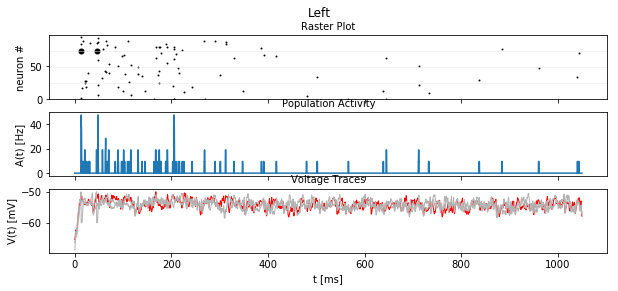

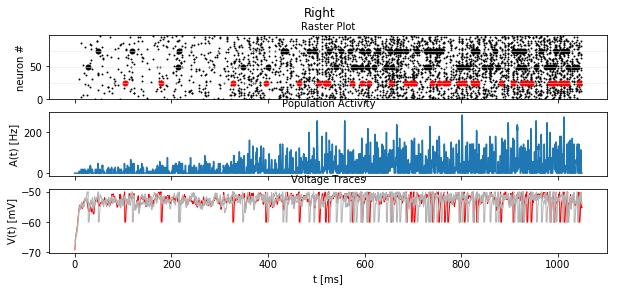

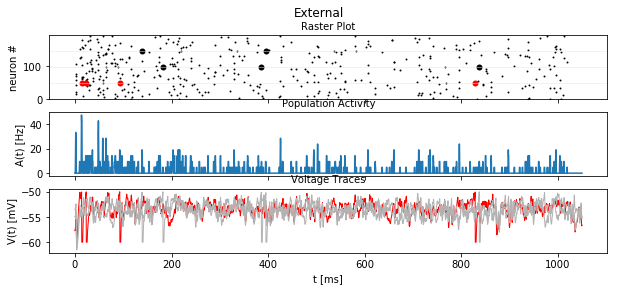

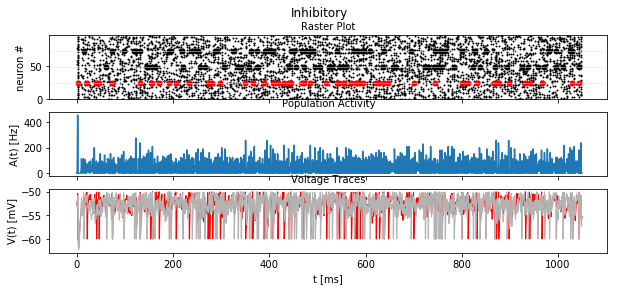

In [81]:
####################
# AVG TIME = 1 ms #
###################

averaging_window_time = 1. * b2.ms

plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Left")

plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Right")
# Extension : 
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="External")

plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Inhibitory")
plt.show()

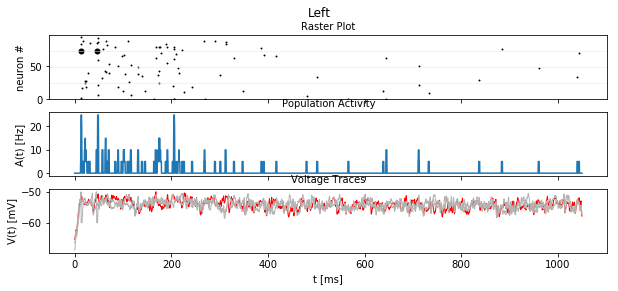

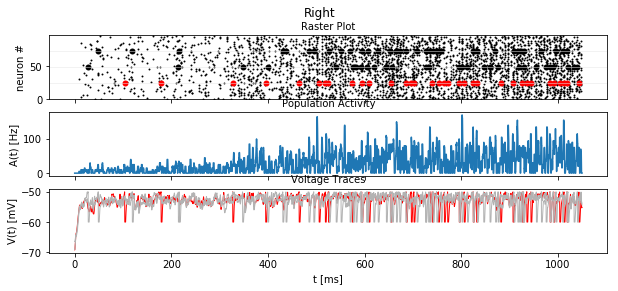

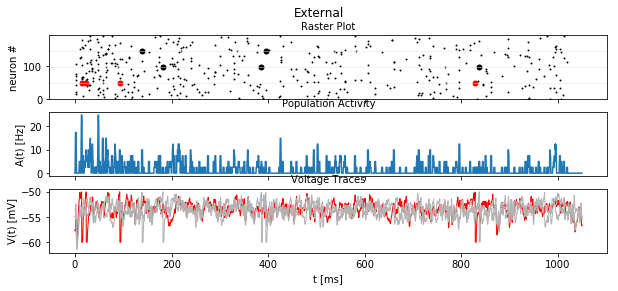

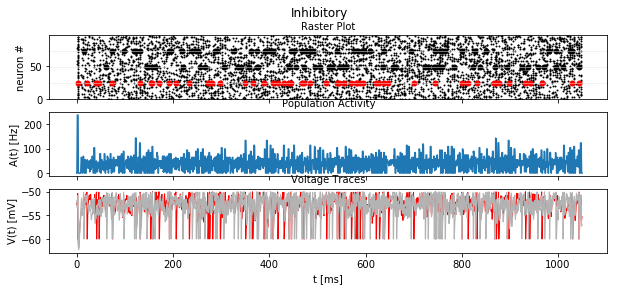

In [82]:
####################
# AVG TIME = 2 ms #
###################

averaging_window_time = 2. * b2.ms

plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Left")

plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Right")
# Extension : 
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="External")

plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Inhibitory")
plt.show()

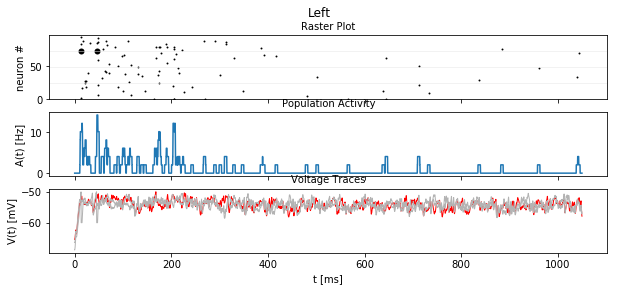

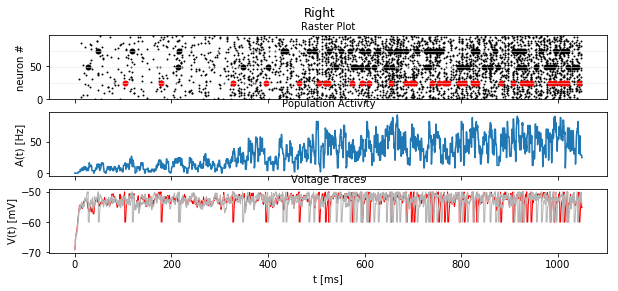

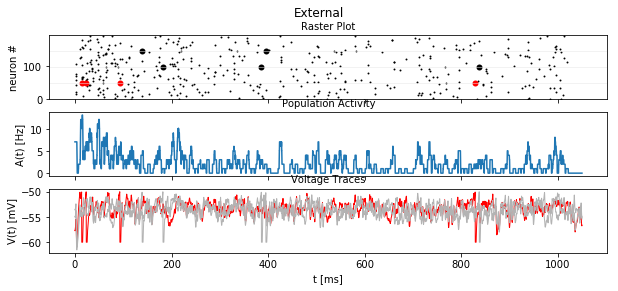

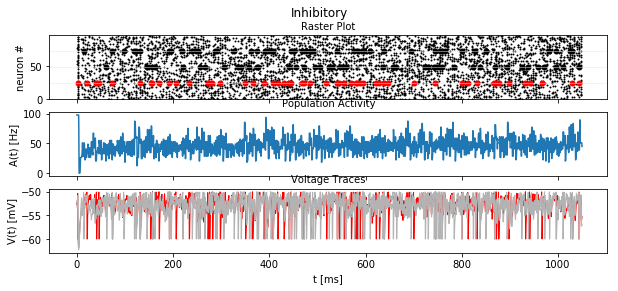

In [83]:
####################
# AVG TIME = 5 ms #
###################

averaging_window_time = 5. * b2.ms

plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Left")

plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Right")
# Extension : 
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="External")

plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Inhibitory")
plt.show()

INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


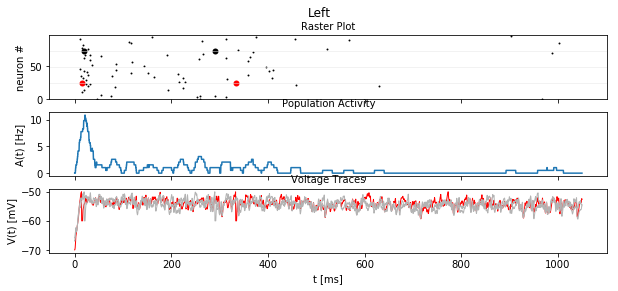

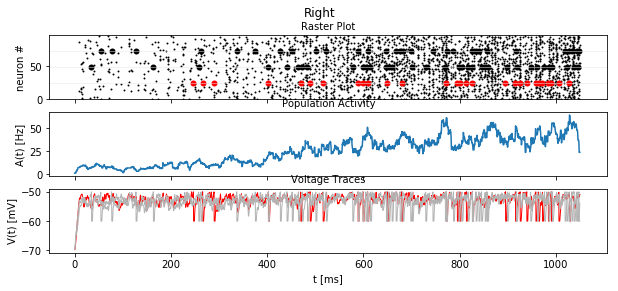

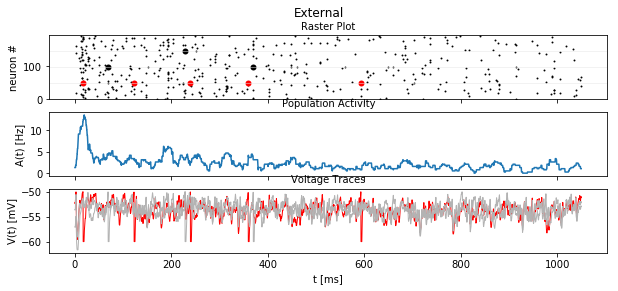

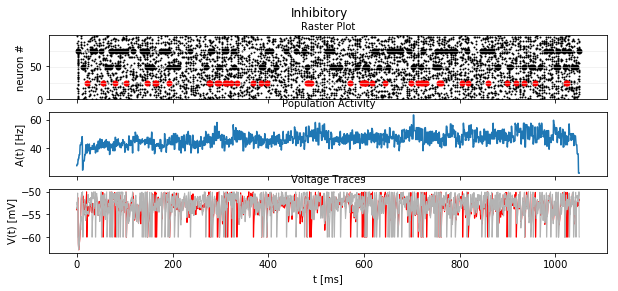

In [8]:
####################
# AVG TIME = 10 ms #
###################

averaging_window_time = 10. * b2.ms

plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Left")

plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Right")
# Extension : 
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="External")

plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Inhibitory")
plt.show()

Without changing any other parameters of the simulation, some differences were noticable by modyfing the averaging window length (AWL).

If we compare the right neuron population with an AWL of 1ms and 10ms, we observe some slight changes. On the Raster plot, neurons doesn't appear to emit a spike at the same instant in both cases. There are way more of them with a short AWL. Also, the activity figure isn't lisible, when a bigger AWL gives a idea of the progression of the population activity. Finally on the voltage trace, a short AWL gives also more spikes. 

To conclude, it seems that a bigger AWL offers a better visibility of the current activity of the neurons. However, picking it with a value too high would makes us lose information in the process.

> Find a value `avg_window_width` for which the population activity plot gives meaningful rates.

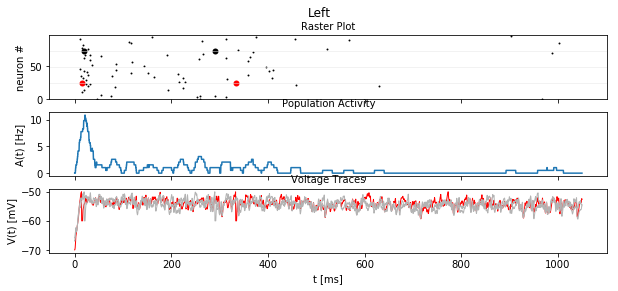

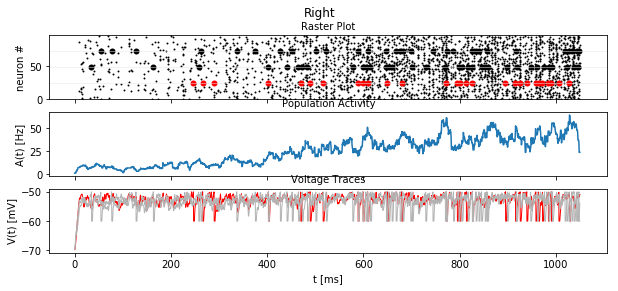

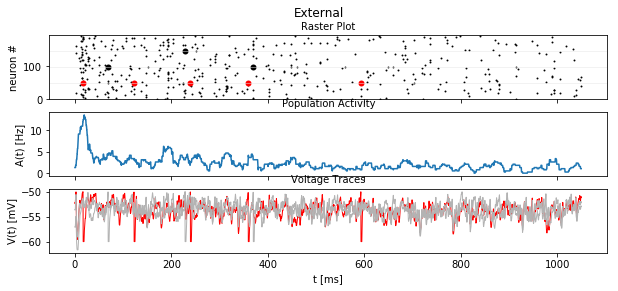

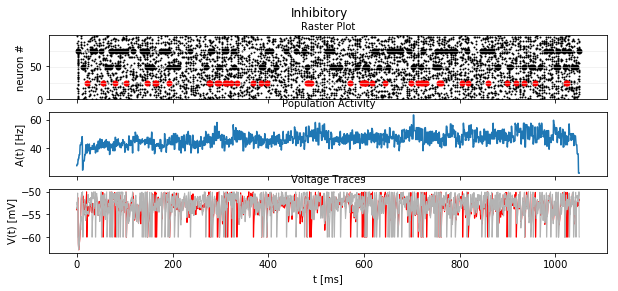

In [15]:
####################
# AVG TIME = 20 ms #
###################

averaging_window_time = 20. * b2.ms

plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Left")

plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Right")
# Extension : 
plot_tools.plot_network_activity(results["rate_monitor_Z"], results["spike_monitor_Z"],
                                 results["voltage_monitor_Z"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="External")

plot_tools.plot_network_activity(results["rate_monitor_inhib"], results["spike_monitor_inhib"],
                                 results["voltage_monitor_inhib"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Inhibitory")
plt.show()

An averaging window length of 20ms seems to offer a great balance between ploting a meaningful population activity rate while also offering us to observe some maxima along it (the rate isn't averaged by a value too large of the window lentgh).

## 13.2.1. Question: Coherence Level (optional, not graded)

> From the equation above, express the difference \mu_{left} - \mu_{right} in terms of \mu_{0} and c.

$\mu_{left} - \mu_{right} = c \mu_{0}$

## 13.2.2. Question: Input stimuli with different coherence levels

> Run a few simulations with c=-0.1 and c=+0.6. Plot the network activity.

In [89]:
t_stimulus_start = 50. * b2.ms
max_sim_time = 1000. * b2.ms + t_stimulus_start

In [90]:
coherence_level = -0.1
results_c_neg = decision_making.sim_decision_making_network(t_stimulus_start= t_stimulus_start,
                                                      coherence_level=coherence_level, max_sim_time=max_sim_time)

simulating 480 neurons. Start: Thu May 18 18:42:45 2017
sim end: Thu May 18 18:44:08 2017


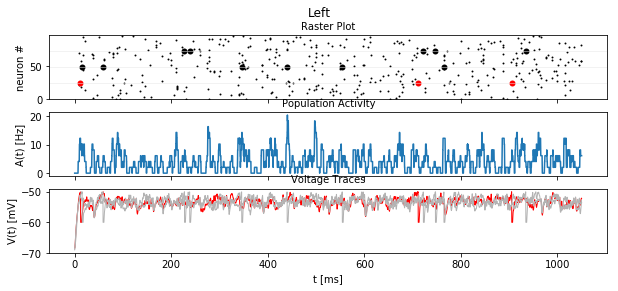

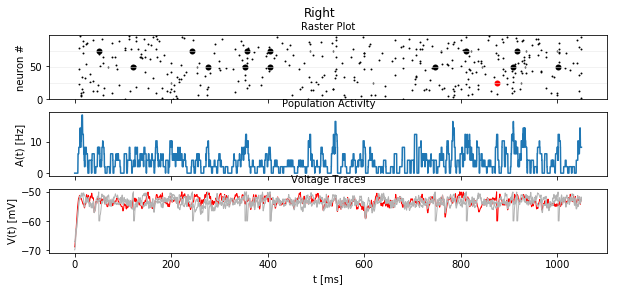

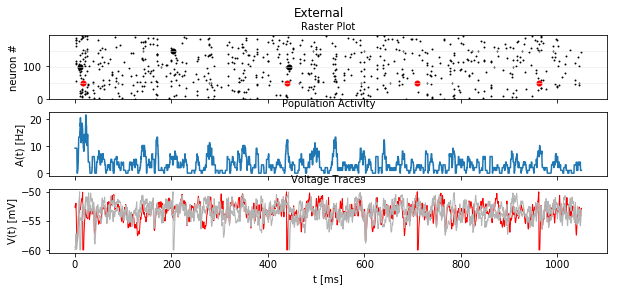

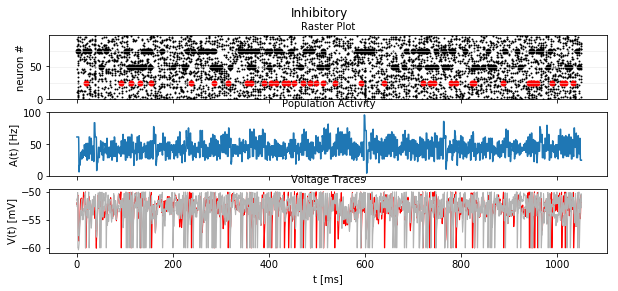

In [91]:
averaging_window_time = 5. * b2.ms

plot_tools.plot_network_activity(results_c_neg["rate_monitor_A"], results_c_neg["spike_monitor_A"],
                                 results_c_neg["voltage_monitor_A"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Left")

plot_tools.plot_network_activity(results_c_neg["rate_monitor_B"], results_c_neg["spike_monitor_B"],
                                 results_c_neg["voltage_monitor_B"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Right")

plot_tools.plot_network_activity(results_c_neg["rate_monitor_Z"], results_c_neg["spike_monitor_Z"],
                                 results_c_neg["voltage_monitor_Z"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="External")

plot_tools.plot_network_activity(results_c_neg["rate_monitor_inhib"], results_c_neg["spike_monitor_inhib"],
                                 results_c_neg["voltage_monitor_inhib"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Inhibitory")
plt.show()

In [92]:
coherence_level = 0.6
results_c_pos = decision_making.sim_decision_making_network(t_stimulus_start= t_stimulus_start,
                                                      coherence_level=coherence_level, max_sim_time=max_sim_time)

simulating 480 neurons. Start: Thu May 18 18:44:24 2017
sim end: Thu May 18 18:45:49 2017


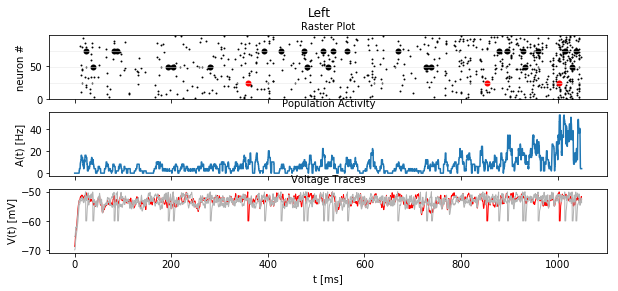

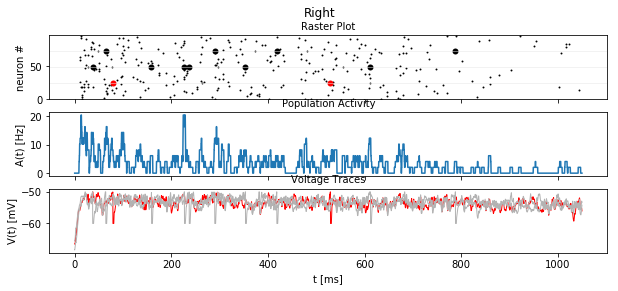

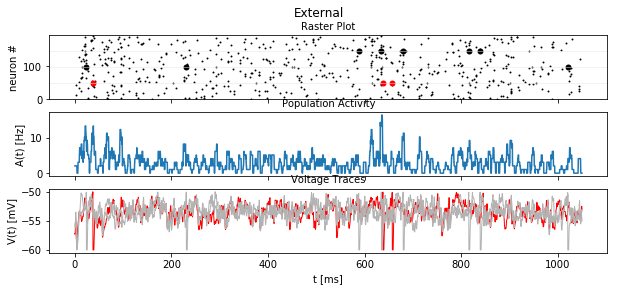

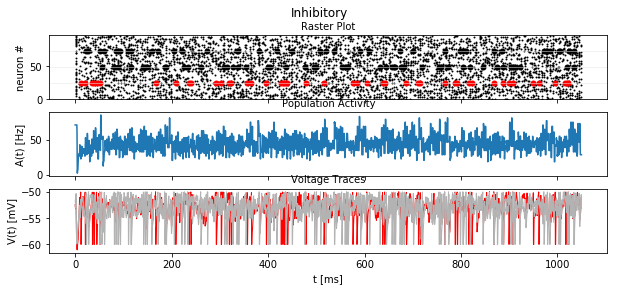

In [93]:
averaging_window_time = 5. * b2.ms

plot_tools.plot_network_activity(results_c_pos["rate_monitor_A"], results_c_pos["spike_monitor_A"],
                                 results_c_pos["voltage_monitor_A"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Left")

plot_tools.plot_network_activity(results_c_pos["rate_monitor_B"], results_c_pos["spike_monitor_B"],
                                 results_c_pos["voltage_monitor_B"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Right")

plot_tools.plot_network_activity(results_c_pos["rate_monitor_Z"], results_c_pos["spike_monitor_Z"],
                                 results_c_pos["voltage_monitor_Z"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="External")

plot_tools.plot_network_activity(results_c_pos["rate_monitor_inhib"], results_c_pos["spike_monitor_inhib"],
                                 results_c_pos["voltage_monitor_inhib"], t_min=0. * b2.ms, 
                                 avg_window_width=averaging_window_time,
                                 sup_title="Inhibitory")
plt.show()

> Does the network always make the correct decision?

The network doesnt always make the correct decision. When the coherence value c is equal to -0.1, the network doesn't take any decision after 1s of simulation. A lack of decision during this amount of time could be seen as a false decision here. Whereas with c = 0.6, the network takes the decision 'left', as the population activity rate of the Left population is strongly increasing towards the end.

> Look at the population rates and estimate how long it takes the network to make a decision.

In the first case, no decision were taken. In the second case, the population rate is strongly increasing in the left population after 850ms. To obtain this result, we consider as a criterion of decision a population rate superior to 20Hz.

## 13.3.1. Question: Plotting the Decision Space

> Write a function that takes two RateMonitors and plots the Decision Space.

In [136]:
def plot_decision_space(monitor_left, monitor_right, avg_window_width=10*b2.ms):
    sr_r = monitor_right.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
    sr_l = monitor_left.smooth_rate(window ="flat", width=avg_window_width) / b2.Hz
    plt.scatter(sr_l, sr_r)
    lim = np.max([np.max(sr_r), np.max(sr_l)]);
    plt.xlabel('Activity Left [Hz]')
    plt.ylabel('Acitivty Right [Hz]')
    plt.xlim(0,lim)
    plt.ylim(0,lim)
    plt.show()

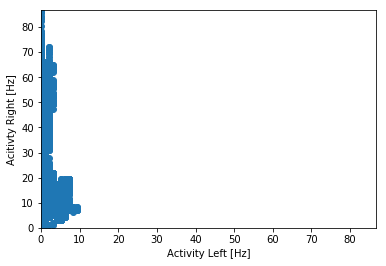

In [137]:
plot_decision_space(results["rate_monitor_A"], results["rate_monitor_B"])

> Add a parameter avg_window_width to your function (same semantics as in the exercise above). Run a few simulations and plot the phase plane for different values of avg_window_width.

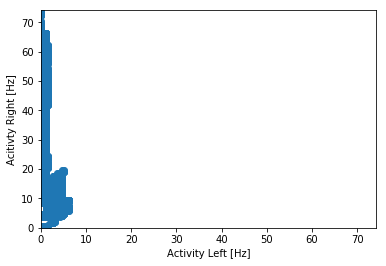

In [138]:
plot_decision_space(results["rate_monitor_A"], results["rate_monitor_B"], 20.1*b2.ms)

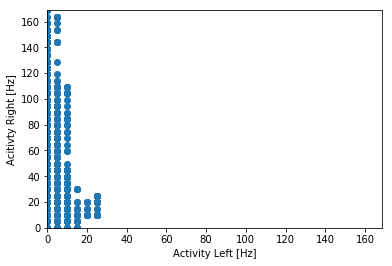

In [139]:
plot_decision_space(results["rate_monitor_A"], results["rate_monitor_B"], 2*b2.ms)

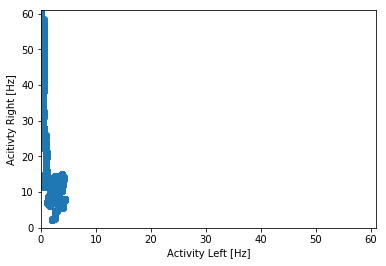

In [140]:
plot_decision_space(results["rate_monitor_A"], results["rate_monitor_B"], 50.1*b2.ms)

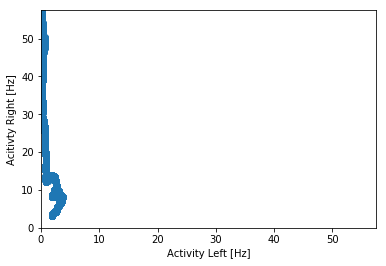

In [141]:
plot_decision_space(results["rate_monitor_A"], results["rate_monitor_B"], 100.1*b2.ms)

> We can use a rate threshold as a decision criterion: We say the network has made a decision if one of the (smoothed) rates crosses a threshold. What are appropriate values for avg_window_width and rate threshold to detect a decision from the two rates?

In our case the decision boundary is crossed very quickly, but we could set a value towards 15 or 20 Hz which seem to represent absolute certainty.

## 13.3.2. Question: Implementing a decision criterion

In [17]:
def get_decision_time(monitor_right, monitor_left, avg_window_width=10*b2.ms, rate_threshold=45.6*b2.Hz):
    sr_r = monitor_right.smooth_rate(window="flat", width=avg_window_width) / b2.Hz
    sr_l = monitor_left.smooth_rate(window ="flat", width=avg_window_width) / b2.Hz    
    
    idx_r = np.argmax(sr_r > rate_threshold / b2.Hz)
    t_r = idx_r * b2.defaultclock.dt
    
    idx_l = np.argmax(sr_l > rate_threshold / b2.Hz)
    t_l = idx_l * b2.defaultclock.dt
    
    return (t_r, t_l)

In [18]:
get_decision_time(results["rate_monitor_A"], results["rate_monitor_B"], avg_window_width=123*b2.ms, rate_threshold=20*b2.Hz)

INFO       width adjusted from 123. ms to 123.1 ms [brian2.monitors.ratemonitor.adjusted_width]


(0. * second, 0.4276 * second)

## 13.4.1. Question: Running multiple simulations

> Use the function `competing_populations.decision_making.run_multiple_simulations()` to get the values for multiple runs. Pass your function `get_decision_time` to `run_multiple_simulations()` :

In [19]:
coherence_levels = [0.6, 0.5, 0.4, 0.3, 0.1, 0., -0.1, -0.2, -0.3, -0.4, -0.5, -0.6]  # for negative values, B is the correct decision.
nr_repetitions = 3
thresh = 15 * b2.Hz
avg_window_width = 10*b2.ms

In [ ]:
### /!\ LONG TO RUN /!\
time_to_A, time_to_B, count_A, count_B, count_No = decision_making.run_multiple_simulations(get_decision_time, coherence_levels, nr_repetitions, max_sim_time=max_sim_time, rate_threshold=thresh, avg_window_width=avg_window_width)

********************************************
coherence_level=0.6
i_run=0
simulating 480 neurons. Start: Fri May 26 17:35:17 2017
sim end: Fri May 26 17:37:21 2017
t_A=22.4 ms, t_B=0. s
decision: A
i_run=1
simulating 480 neurons. Start: Fri May 26 17:37:21 2017


> Write a function that takes coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No and writes Percent correct (for each level in coherence_levels) to the terminal.

> Think about other values you could get from the data. Add them to your function.

In [ ]:
def get_percent_correct(coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No):
    runs = 3.
    accuracies = []
    for idx, c in enumerate(coherence_levels):
        if c < 0:
            print("{} - Expected result = B.".format(idx))
            acc = print_accuracies(count_B[idx], count_A[idx], count_No[idx])
        else:
            print("{} - Expected result = A.".format(idx))
            acc = print_accuracies(count_A[idx], count_B[idx], count_No[idx])
        accuracies.append((c,acc))
        
    return accuracies

            
            
def print_accuracies(count_correct, count_incorrect, count_No, runs=3.):
    accuracy = count_correct / runs
    print("Accuracy : {}".format(accuracy))
    print("Misclassified A : {}".format(count_incorrect/runs))
    print("No decision : {}".format(count_No/runs))
    print("\n")
    return accuracy

In [ ]:
accuracies = get_percent_correct(coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No)

In [ ]:
x = list(zip(*accuracies)[0])
y = list(zip(*accuracies)[1])
y = map(lambda x: x*100, y)

plt.plot(x,y)
plt.grid(True)
plt.show()

## 13.4.2. Question: Percent-Correct, Time-to-decision

In [ ]:
import brian2 as b2
from neurodynex.competing_populations import decision_making

coherence_levels = [0.15, -0.8]
nr_repetitions = 20

# do not set other parameters (=defaults are used).
time_to_A, time_to_B, count_A, count_B, count_No = decision_making.run_multiple_simulations(get_decision_time, coherence_levels, nr_repetitions, max_sim_time=1200 * b2.ms)

# you may want to wrap the visualization into a function
plot_simulation_stats(coherence_levels, time_to_A, time_to_B, count_A, count_B, count_No)

# 13.5 The Drift-Diffusion Model

This exercise is not available online. All information is given here.

So far you have studied a decision making process emerging from the competitive interaction between neuronal populations. In this exercise, we will explore a different approach for modelling decision making, the drift-diffusion model. This model is introduced in paragraph 16.4.2 of the book. It is a phenomenological model which is used to describe the decision making process between two mutually exclusive options (see the experiment on motion perception, described in chapter 16.1).

At every trial the decision variable $x$ is initialized at time $t_0$ at a value $x(t_0)=x_0$. Then, it evolves according to:
\begin{eqnarray}
\frac{dx}{dt} = \mu + \sigma \xi(t),
\end{eqnarray}
where $\mu = \mu_{left}-\mu_{right}$ and $\xi(t)$ is Gaussian white noise of zero mean and unit variance $\sigma^2$.

The analytical solution of this stochastic differential equation is beyond the scope of this exercise; we refer to  text books on stochastic processes or e.g. https://en.wikipedia.org/wiki/Random_walk.

Here we simply use the result that the distribution of $x$ at time $t$ is a normal distribution depending on $x$ at time $s$, $(s\leq t)$.
\begin{eqnarray}
x_t-x_s \sim \mathcal{N}(\mu (t-s), \sigma^2 (t-s)).
\end{eqnarray}

In discretized time, the increment of the decision variable $\Delta x$ after time $\Delta t$ is
\begin{eqnarray}
\Delta x \sim \mathcal{N}(\mu \Delta t, \sigma^2 \Delta t).
\end{eqnarray}

We assume that a decision is made when the decision variable hits one of the boundaries at $x=\pm B$. 
When the desicion is made, the simulation ends.

The reaction time is the time it takes the decision variable to reach one of the boundaries.

### Exercise

1. Complete the provided code segments to write a function that simulates one trial of the drift-diffusion model. The function should take parameters $\mu$, $\sigma$, and a boundary $B$ as inputs and return the final choice, its correctness, the reaction time for that trial, and the whole trajectory of the decision variable. Note that the correctness ($x=\pm B$) of the reaction is dependent on the sign of $\mu$. 
2. Set $\mu=0.001$, $\sigma=0.1$ and $B=1$. Plot the decision variable trajectories for 100 trials in the same figure. Now make the same plot with $\sigma=0.01$. Discuss the difference.
3. Simulate your drift-diffusion model for 10000 trials with $\mu=0.001, \sigma=0.05, B=1$ and plot the reaction time distribution. Separate correct and wrong decisions. Understand and briefly describe the provided function plot_rt_distribution. Use it to plot the reaction time histogram. 
4. Now simulate your model with different initial values $x_0\neq0$ for your decision variable. To do so, write a new function by modifying your function of Question 1 by adding the new parameter $x_0$ to it. Plot the decision variable trajectories and the reaction time histogram (i.e repeat the plots of Questions 2 and 3) for different combinations of $x_0\in (-B,B)$ and $\mu$. Discuss your results.

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mu=???
sigma=???
B=???

dt=1. # time step size (ms)
T_max=2500

# Function that simulates one trial of the drift-diffusion model
def sim_drift_diffusion(mu, sigma, B):
    """
    Args:
        mu (float) : drift rate of the decision variable (=mu_left - mu_right)
        sigma (float) : variance of the decision variable
        B (float): boundary value
        
    Returns:
        choice (int) : final decision
        correct (boolean) : whether final decision is correct or not
        reaction_time (float) : time it took to reach a decision
        x_plot (array) : decision variable values over the whole simulation (trajectory)
        
    """
    
    # Initialize x
    x = 0
    
    # Storage
    x_plot = [x]
    
    # Loop over time
    for t in np.arange(dt,T_max,dt):
        
        # Implement the increment of the decision variable.
        # Use np.random.randn to draw x from a gaussian distribution
        x += ???
        
        x_plot.append(x) # save new x

        # check boundary conditions
        if x > B:
            reaction_time = ??? 
            choice = ???
            break
        if x < -B:
            reaction_time = ???
            choice = ???
            break
    
    # If no boundary is hit before maximum time, 
    # choose according to decision variable value
    if t == T_max-dt:
        reaction_time = ??? # set reaction_time to T_max and:
        choice = ??? # "Force" a choice depending on the sign of x
    
    # Determining correctness depending on sign of mu
    if mu >= ...
        correct = ??? # Boolean variable for trial's correctness
    else
        correct = ???
    return choice, correct, reaction_time, x_plot


# Call your function for many trials and plot the trajectories 
n_trials=???
plt.figure()
for i_trial in range(n_trials):
    
    # Plot the decision variable vs time
    # Tip: The parameter alpha of the plot function sets the transparency of the line. 
    # Adjust it to show more trajectories on the same plot.
    
    
plt.xlabel('Time (ms)') 
plt.ylabel('Decision variable')
plt.ylim((-B,B))

In [ ]:
# Function that takes reaction time as input and plots a histogram
def plot_rt_distribution(rt_correct, rt_wrong, bins=None):
    '''
    rt_correct/rt_wrong : array of reaction time for correct/error trials
    bins: if given, the bins for plotting
    '''
    if bins is None:
        maxrt = max((max(rt_correct),max(rt_wrong)))
        bins = np.linspace(0,maxrt,26)
    count1, bins_edge = np.histogram(rt_correct, bins=bins)
    count0, bins_edge = np.histogram(rt_wrong, bins=bins)
    n_rt = float(len(rt_wrong) + len(rt_correct))
    
    plt.figure()
    plt.bar(bins_edge[:-1], count1/n_rt, np.diff(bins_edge), color='blue', edgecolor='white')
    plt.bar(bins_edge[:-1], -count0/n_rt, np.diff(bins_edge), color='red', edgecolor='white')
    
    titletxt = 'Proportion correct {:0.2f}, '.format(sum(count1)/n_rt)
    titletxt += 'Mean reaction time {:0.0f}/{:0.0f} ms'.format(np.mean(rt_correct),np.mean(rt_wrong))
    
    plt.ylabel('Proportion')
    plt.xlabel('Reaction Time')
    plt.title(titletxt)
    plt.xlim((bins.min(),bins.max()))
    

# Loop over trials, for each trial call your function
n_trials=???

for i_trial in range(n_trials):
    
    # Call your function. 
    # For each trial store its reaction time and its correctness in two arrays

    
# Plot the reaction time histogram
bins = np.linspace(0,T_max,26)
# Separate correct and wrong trials
rt_correct=???
rt_wrong=???
plot_rt_distribution(???)